https://colab.research.google.com/github/google-research/bert/blob/master/predicting_movie_reviews_with_bert_on_tf_hub.ipynb#scrollTo=ccp5trMwRtmr

In [2]:
#used to import the data set
from google.colab import files
uploaded=files.upload()

Saving facultyAbstracts.csv to facultyAbstracts.csv


In [ ]:
%ls
!pip install nltk
!pip install gensim 

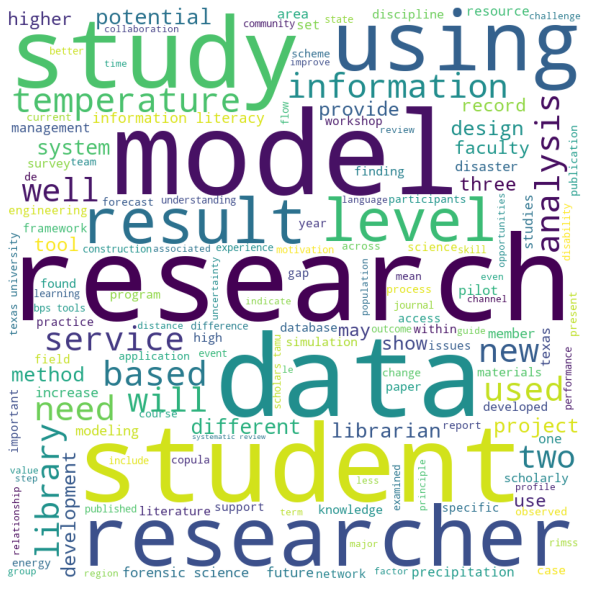

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
df = pd.read_csv("facultyAbstracts.csv") # change this to the csv file name
  
comment_words = ' '
stopwords = set(STOPWORDS)

notes = list(df['dc.description.abstract[en]'])[2:72] # change this to the name of the column
#applied from cell 2 to 72, basic from cell 73 to 203 
# iterate through the csv file 

for note in notes: 
      
    # typecaste each val to string 
    note = str(note) 
  
    # split the value 
    tokens = note.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Dictionary(12476 unique tokens: ['attendance', 'awareness', 'bcspls', 'bonds', 'bring']...)


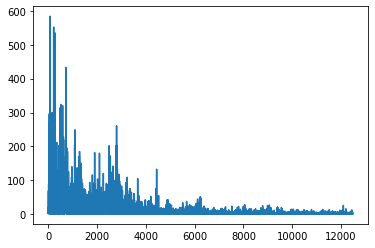

In [7]:
import gensim
import re
from gensim import corpora
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords

abstracts = (df['dc.description.abstract[en]']).to_string()
words = []
for i in range(len(df['dc.description.abstract[en]'])):
  abstracts = (df['dc.description.abstract[en]'].iloc[i])
  abstracts = abstracts.lower()
  abstracts = re.sub('[^a-zA-Z]', ' ', abstracts)
  abstracts = remove_stopwords(abstracts)
  words.append(abstracts)
  

df['new_abstracts'] = words

list(df['new_abstracts'])

texts = [[text for text in doc.split()] for doc in list(df['new_abstracts'])]

dictionary = corpora.Dictionary(texts)

print(dictionary)

mycorpus = [dictionary.doc2bow(doc, allow_update=True) for doc in texts]

word_counts = [[(dictionary[id], count) for id, count in line] for line in mycorpus]

freq=np.zeros(len(dictionary));
freq_doc=np.zeros(len(dictionary));
for i in range(len(word_counts)):
  for j in range(len(word_counts[i])):
    freq[int(mycorpus[i][j][0])]=freq[int(mycorpus[i][j][0])]+mycorpus[i][j][1]
    freq_doc[int(mycorpus[i][j][0])]=freq_doc[int(mycorpus[i][j][0])]+1

#Comments for looking at certain aspects of the data
#print(texts[0])
#print(dictionary)
#print(freq.max())
#freq = np.sort(freq, axis = 0)
#print(max(freq))
#print(freq)
#print(mycorpus)
#print(len(mycorpus))
#print(mycorpus[0][0][1])
#print(mycorpus[1])
#print(dictionary[0])
#print(word_counts[1][0][0])             #brackets are in order of abstract, word number, word/count
plt.plot(freq)              #the most frequent word is at index 53

In [9]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
initiative bryan college station public library bcspls sought increase public awareness library programs bring new larger groups patrons main focus financial literacy entrepreneurship led collaborations local non profit organizations educational institutions partnerships program offerings resulted increased program attendance strengthened community bonds increased awareness library resources
Cosine similarity between 'college' and 'library' - CBOW :  -0.024828004
Cosine similarity between 'college' and 'community' - CBOW :  0.017878689
Cosine similarity between 'college' and 'partnerships' - CBOW :  0.07551622
Cosine similarity between 'library' and ' college' - Skip Gram :  0.99999994
Cosine similarity between 'library' and 'initiative' - Skip Gram :  -0.07086348
[('non', 0.10218887776136398), ('led', 0.0973617434501648), ('financial', 0.08353576064109802), ('literacy', 0.078

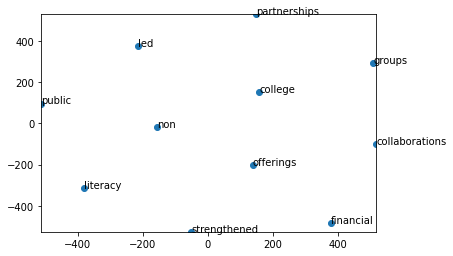

In [10]:
# Python program to generate word vectors using Word2Vec 

# importing all necessary modules 
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
from sklearn.manifold import TSNE

warnings.filterwarnings(action = 'ignore') 

import gensim 
from gensim.models import Word2Vec 

# Reads ‘alice.txt’ file 
#sample = open("C:\\Users\\Admin\\Desktop\\alice.txt", "r") 
#s = sample.read() 
s = list(df['new_abstracts'])[0]
# Replaces escape character with space 
f = s.replace("\n", " ") 
print(f)
data = [] 

# iterate through each sentence in the file 
for i in sent_tokenize(f): 
	temp = [] 
	
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 

	data.append(temp) 

# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, 
							size = 300, window = 5) 

# Print results 
print("Cosine similarity between 'college' " +
			"and 'library' - CBOW : ", 
model1.similarity('college', 'library')) 

print("Cosine similarity between 'college' " +
				"and 'community' - CBOW : ", 
model1.similarity('college', 'community')) 

print("Cosine similarity between 'college' " +
				"and 'partnerships' - CBOW : ", 
model1.similarity('college', 'partnerships')) 

# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
											window = 5, sg = 1) 

# Print results 
print("Cosine similarity between 'library' " +
		"and ' college' - Skip Gram : ", 
	model2.similarity('library', 'library')) 

print("Cosine similarity between 'library' " +
			"and 'initiative' - Skip Gram : ", 
	model2.similarity('library', 'initiative')) 

print(model1.similar_by_word('college'))
print(len(model1.similar_by_word('college')))
display_closestwords_tsnescatterplot(model1, 'college')

In [14]:
import gensim
import re
from gensim import corpora
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.model_selection import train_test_split

data_x=df['new_abstracts'][0:201]
data_y=df['ActivityType'][0:201]

x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=3)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=30)

texts = [[text for text in doc.split()] for doc in x_train]
texts_v= [[text for text in doc.split()] for doc in x_val]
texts_t= [[text for text in doc.split()] for doc in x_test]
labeled_dictionary = corpora.Dictionary(texts)

mycorpus = [labeled_dictionary.doc2bow(doc, allow_update=True) for doc in texts]

word_counts = [[(labeled_dictionary[id], count) for id, count in line] for line in mycorpus]

freq=np.zeros(len(labeled_dictionary));
freq_doc=np.zeros(len(labeled_dictionary));

for i in range(len(mycorpus)):
  for j in range(len(mycorpus[i])):
    freq[int(mycorpus[i][j][0])]=freq[int(mycorpus[i][j][0])]+mycorpus[i][j][1]
    freq_doc[int(mycorpus[i][j][0])]=freq_doc[int(mycorpus[i][j][0])]+1

bad_ids=[]

for i in range(len(labeled_dictionary)):
  if(freq_doc[i]<10):
    bad_ids.append(i)

labeled_dictionary.filter_tokens(bad_ids=bad_ids)
#print(np.shape(labeled_dictionary))

#Created the corpuses to be used in the testing of the feed forward neural networks
my_corpus_filtered=[labeled_dictionary.doc2bow(doc, allow_update=False) for doc in texts]
my_corpus_val=[labeled_dictionary.doc2bow(doc, allow_update=False) for doc in texts_v]
my_corpus_t=[labeled_dictionary.doc2bow(doc, allow_update=False) for doc in texts_t]


(146,)


In [16]:
## ngram function code
# converts the text to a series of both uni-grams and bi-grams

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1,2)

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'

# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

def ngram_vectorize(train_texts, train_labels, val_texts, test_texts):
    """Vectorizes texts as n-gram vectors.

    1 text = 1 tf-idf vector the length of vocabulary of unigrams + bigrams.

    # Arguments
        train_texts: list, training text strings.
        train_labels: np.ndarray, training labels.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val: vectorized training and validation texts
    """
    # Create keyword arguments to pass to the 'tf-idf' vectorizer.
    kwargs = {
            'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE,  # Split text into word tokens.
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }
    vectorizer = TfidfVectorizer(**kwargs)

    # Learn vocabulary from training texts and vectorize training texts.
    print("length"+str(len(train_texts)))
    
    x_train = vectorizer.fit_transform(train_texts)
    print(x_train.shape)
    
    # Vectorize validation texts.
    
    x_val = vectorizer.transform(val_texts)
    print(x_val.shape)
    
    x_test=vectorizer.transform(test_texts)
    print(x_test.shape)

    # Select top 'k' of the vectorized features.
    
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')
    x_test = selector.transform(x_test).astype('float32')
    return x_train, x_val, x_test

In [17]:
## reading abstracts and labels from dataframe and getting features
from sklearn.model_selection import train_test_split
data_x=df['dc.description.abstract[en]'][0:201]
data_y=df['ActivityType'][0:201]

x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=3)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=30)

y_train=y_train.to_numpy()
y_val=y_val.to_numpy()
y_test=y_test.to_numpy()

for i in range(len(y_train)):
  if(y_train[i]=="Basic"):
    y_train[i]=0
  else:
    y_train[i]=1
y_train = y_train.astype('float64')

for i in range(len(y_val)):
  if(y_val[i]=="Basic"):
    y_val[i]=0
  else:
    y_val[i]=1
y_val = y_val.astype('float64')

for i in range(len(y_test)):
  if(y_test[i]=="Basic"):
    y_test[i]=0
  else:
    y_test[i]=1
y_test = y_test.astype('float64')
x_train_features,x_val_features,x_test_features=ngram_vectorize(x_train,y_train,x_val,x_test)

length160
(160, 3794)
(21, 3794)
(20, 3794)


In [18]:
from scipy.sparse import csr_matrix
x_train_features=csr_matrix(x_train_features,dtype=np.double).toarray()
x_val_features=csr_matrix(x_val_features,dtype=np.double).toarray()
x_test_features=csr_matrix(x_test_features,dtype=np.double).toarray()


In [19]:
x_features=np.zeros((len(my_corpus_filtered),len(labeled_dictionary)))
x_val_features=np.zeros((len(my_corpus_val),len(labeled_dictionary)))
x_test_features=np.zeros((len(my_corpus_t),len(labeled_dictionary)))
for i in range(len(my_corpus_filtered)):
  for j in range(len(my_corpus_filtered[i])):
    x_features[i,int(my_corpus_filtered[i][j][0])]=my_corpus_filtered[i][j][1]

for i in range(len(my_corpus_val)):
  for j in range(len(my_corpus_val[i])):
    x_val_features[i,int(my_corpus_val[i][j][0])]=my_corpus_val[i][j][1]

for i in range(len(my_corpus_t)):
  for j in range(len(my_corpus_t[i])):
    x_test_features[i,int(my_corpus_t[i][j][0])]=my_corpus_t[i][j][1]
y_train=y_train.to_numpy()
y_val=y_val.to_numpy()
y_test=y_test.to_numpy()
for i in range(len(y_train)):
  if(y_train[i]=="Basic"):
    y_train[i]=0
  else:
    y_train[i]=1
y_train = y_train.astype('float64')

for i in range(len(y_val)):
  if(y_val[i]=="Basic"):
    y_val[i]=0
  else:
    y_val[i]=1
y_val = y_val.astype('float64')

for i in range(len(y_test)):
  if(y_test[i]=="Basic"):
    y_test[i]=0
  else:
    y_test[i]=1
y_test = y_test.astype('float64')



AttributeError: ignored

In [20]:
#This cell does not work, but was originally used for the feed forward neural network implementation
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

mlp_clf=tf.keras.models.Sequential()
mlp_clf.add(tf.keras.Input(shape=(x_train_features.shape[1])))

mlp_clf.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.0001,l1=0.001)))
mlp_clf.add(Dropout(rate=0.5))

mlp_clf.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.0001,l1=0.001)))
mlp_clf.add(Dropout(rate=0.5))

mlp_clf.add(Dense(16,activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.0001,l1=0.001)))
mlp_clf.add(Dropout(rate=0.5))

mlp_clf.add(Dense(1,activation='sigmoid'))

mlp_clf.build()
mlp_clf.summary()
opt_adam=tf.keras.optimizers.Adam(lr=0.0001)
mlp_clf.compile(loss='binary_crossentropy',optimizer=opt_adam,metrics='accuracy')
hist=mlp_clf.fit(x=x_train_features,y=y_train,batch_size=5,epochs=50,verbose=2,validation_data=(x_val_features,y_val))
i=range(0,50)
plt.figure()
plt.plot(i,hist.history['loss'],'r')
plt.plot(i,hist.history['val_loss'],'g')
plt.xlabel("Epoch Number")
plt.ylabel("Loss Value")
#plt.legend()
plt.legend(["Loss","Validation Loss"])
plt.show()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 64)                242880    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 64)                0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 32)                2080      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 32)                0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 16)                528       
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 16)                0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 1)                 1

ValueError: ignored

https://towardsdatascience.com/machine-learning-text-classification-language-modelling-using-fast-ai-b1b334f2872d

https://towardsdatascience.com/fastai-with-transformers-bert-roberta-xlnet-xlm-distilbert-4f41ee18ecb2


In [21]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=None, random_state=0,penalty='l2',alpha=0.002)
clf.fit(x_features,y_train)
print(clf.score(x_features,y_train))
print(clf.score(x_val_features,y_val))


0.875
0.7142857142857143


CSV to TSV converter

In [ ]:
#may need to do some more pre processing to convert to a tsv
import csv
import pandas as pd
col_list = ["dc.description.abstract[en]", "ActivityType"]
df = pd.read_csv("facultyAbstracts.csv", usecols=col_list)
df.to_csv('formatted_csv.csv')

with open('formatted_csv.csv', 'r', encoding='utf8') as csvin, open('formatted_data.tsv', 'w', encoding='utf8') as tsvout:
    csvin = csv.reader(csvin)
    tsvout = csv.writer(tsvout, delimiter='\t')

    for row in csvin:
        tsvout.writerow(row)

Importing Bert

In [ ]:
!pip install sentencepiece

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#Gonna need to see if this works or not
import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import tokenization

Bert Helper Functions

In [ ]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-6), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def convert_labels(labels):
  new_labels = []
  for text in labels:
    if(text == 'Applied'):
      new_labels.append(1)
    else:
      new_labels.append(0)
  return np.asarray(new_labels)

Using Bert

In [ ]:
!pip install tensorflow==2.0

In [ ]:
pip list | grep tensorflow


tensorflow                    2.0.0              
tensorflow-datasets           4.0.1              
tensorflow-estimator          2.0.1              
tensorflow-gcs-config         2.5.0              
tensorflow-hub                0.12.0             
tensorflow-metadata           1.0.0              
tensorflow-probability        0.12.1             


In [ ]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 14 s, sys: 2.61 s, total: 16.6 s
Wall time: 16.6 s


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.model_selection import train_test_split
#This is preprocessing the data into DataFrame

#data_file = open("formatted_data.tsv")
#data = csv.reader(data, delimiter="\t")
#data_file.close()

df = pd.DataFrame()
df = pd.read_csv('formatted_data.tsv', skipinitialspace=True,sep='\t', header=0)

#display(df)

data_x=df['dc.description.abstract[en]'][1:201].to_numpy()
data_y=df['ActivityType'][1:201].to_numpy()

x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=3)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=30)

np.random.seed(42)
trn_ids=np.random.permutation(len(x_train))
val_ids=np.random.permutation(len(x_val))

x_train=x_train[trn_ids]
y_train=y_train[trn_ids]
x_val=x_val[val_ids]
y_val=y_val[val_ids]

col_names = ['labels','text']
df_train = pd.DataFrame({'text':x_train, 'labels':y_train},columns=col_names)
df_val = pd.DataFrame({'text':x_train, 'labels':y_train},columns=col_names)

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
#Our Data
train_input = bert_encode(df_train.values.T[1], tokenizer, max_len=160)
test_input = bert_encode(df_val.values.T[1], tokenizer, max_len=160)
train_labels = convert_labels(df_train.values.T[0])

In [ ]:
#Kaggle Data
train_input = bert_encode(train.text.values, tokenizer, max_len=160)
test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values

In [ ]:
#train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")
#submission = pd.read_csv("sample_submission.csv")

In [ ]:
from tensorflow import keras
#model = keras.models.load_model('/content/drive/MyDrive/model.h5')
model = build_model(bert_layer, max_len=160)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/My Drive/model.h5', monitor='val_loss', save_best_only=True)

train_history = model.fit(
   train_input, train_labels,
   validation_split=0.2,
   epochs=4,
   callbacks=[checkpoint],
   batch_size=2
)

# train_history = model.fit(
#     train_input, train_labels,
#     validation_split=0.2,
#     epochs=4,
#     batch_size=3
# )
#train_history = model.fit(train_input, train_labels, validation_split=0.2, epochs=3, batch_size=16)
#mess with the batch size to see if it helps with loss
#k-fold cross validation
#bag of words
#bag of words with tf-idf (term frequency-inverse document frequency)

#need to give a third option for when an abstract cant really fit
#look into the documentation for model.fit
#also test the code with the actual data at https://www.kaggle.com/misakrug/nlpgettingstarted?select=train.csv

Train on 128 samples, validate on 32 samples
Epoch 1/4
128/128 [==============================] - 1278s 10s/sample - loss: 0.6225 - accuracy: 0.6641 - val_loss: 0.3607 - val_accuracy: 0.8125
Epoch 2/4
128/128 [==============================] - 1319s 10s/sample - loss: 0.3891 - accuracy: 0.8047 - val_loss: 0.3486 - val_accuracy: 0.8438
Epoch 3/4
128/128 [==============================] - 1355s 11s/sample - loss: 0.2266 - accuracy: 0.9219 - val_loss: 0.3332 - val_accuracy: 0.8438
Epoch 4/4
128/128 [==============================] - 1212s 9s/sample - loss: 0.1299 - accuracy: 0.9844 - val_loss: 0.3491 - val_accuracy: 0.8750


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = df[202:1211]
#len(max(data['dc.description.abstract[en]']))

# display(data.at[399,'dc.description.abstract[en]'])
# data = data.drop([399])
# display(data.at[400,'dc.description.abstract[en]'])


# for i in range(len(data)):
#   if len(data.at[i+202,'dc.description.abstract[en]']) > 10000:
#     data = data.drop([i+202])
#     # display(i+202)
#     # display(data.at[i+202,'dc.description.abstract[en]'])

#len(data.at[i+202,'dc.description.abstract[en]'])
#data
#display(len(data))
#data['dc.description.abstract[en]'].values
display(len(data.values))
data_input = bert_encode(data.values.T[1], tokenizer, max_len=160)

1008

In [ ]:
#Uses the abstracts to get a result
model.load_weights('/content/drive/MyDrive/model.h5')
test_pred = model.predict(data_input, batch_size=2)

AttributeError: ignored

In [ ]:
import os
rootdir = '/content/drive/My Drive/Lowe\'s Library Project/fac_items'

fulltexts = []
handles = []

for subdir, dirs, files in os.walk(rootdir):
  if(len(files) == 2):
    for file in files:
      if((files[0] == 'handle' and files[1].endswith(".txt")) or (files[0].endswith(".txt") and files[1] == 'handle')):
        filename = os.path.join(subdir, file)
        if(file.endswith(".txt")):
          with open(filename) as f:
            text = f.read()
            fulltexts.append(text)
            f.close()
        if(file.endswith('handle')):
          with open(filename) as h:
            handle = h.read()
            handles.append(handle)
            h.close()

In [ ]:
display(len(fulltexts))

1117

In [ ]:
from pandas import DataFrame
import pandas as pd
import numpy as np

full_text_df1 = pd.DataFrame(np.column_stack([fulltexts[0:249],handles[0:249]]), columns = ['Full_Text','Handles'])
full_text_df2 = pd.DataFrame(np.column_stack([fulltexts[250:499],handles[250:499]]), columns = ['Full_Text','Handles'])
full_text_df3 = pd.DataFrame(np.column_stack([fulltexts[500:749],handles[500:749]]), columns = ['Full_Text','Handles'])
full_text_df4 = pd.DataFrame(np.column_stack([fulltexts[750:999],handles[750:999]]), columns = ['Full_Text','Handles'])
full_text_df5 = pd.DataFrame(np.column_stack([fulltexts[1000:1116],handles[1000:1116]]), columns = ['Full_Text','Handles'])

In [ ]:
full_text_input_df1 = bert_encode(full_text_df1.values.T[1], tokenizer, max_len = 160)
full_text_input_df2 = bert_encode(full_text_df2.values.T[1], tokenizer, max_len = 160)
full_text_input_df3 = bert_encode(full_text_df3.values.T[1], tokenizer, max_len = 160)
full_text_input_df4 = bert_encode(full_text_df4.values.T[1], tokenizer, max_len = 160)
full_text_input_df5 = bert_encode(full_text_df5.values.T[1], tokenizer, max_len = 160)

In [ ]:
#Uses the fulltexts to get a result
from keras.models import load_model

model = load_model('/content/drive/MyDrive/model.h5')
#full_text_pred = model.predict(full_text_input, batch_size=2)

ImportError: ignored

In [ ]:
len(max(data['dc.description.abstract[en]']))
#len(data_input[0])


643

In [ ]:
data['ActivityType'] = test_pred.round().astype(int)
data.to_csv('test_submission.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


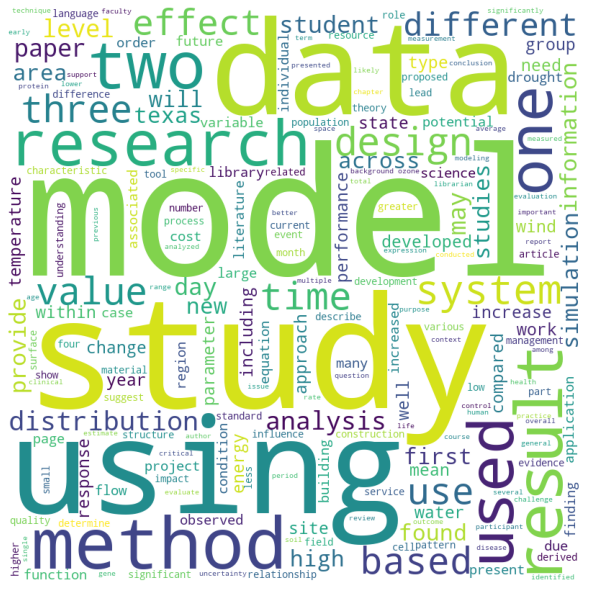

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
df = pd.read_csv("test_submission.csv") # change this to the csv file name
  
comment_words = ' '
stopwords = set(STOPWORDS)

notes = list(df['dc.description.abstract[en]'])[707:1008] # change this to the name of the column
#applied from cell 707 to 1008, basic from cell 1 to 706
# iterate through the csv file 

for note in notes: 
      
    # typecaste each val to string 
    note = str(note) 
  
    # split the value 
    tokens = note.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 